In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('combined_data.csv')

In [3]:
df.columns

Index(['POSTED_SPEED_LIMIT', 'WEATHER_CONDITION', 'LIGHTING_CONDITION',
       'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'ALIGNMENT',
       'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'PRIM_CONTRIBUTORY_CAUSE',
       'SEC_CONTRIBUTORY_CAUSE', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK',
       'CRASH_MONTH', 'MANEUVER', 'SEX', 'AGE'],
      dtype='object')

In [5]:
df

,POSTED_SPEED_LIMIT,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,MANEUVER,SEX,AGE
0,15,CLEAR,DAYLIGHT,REAR END,OTHER,STRAIGHT AND LEVEL,DRY,NO DEFECTS,FOLLOWING TOO CLOSELY,DISTRACTION - FROM INSIDE VEHICLE,12.0,6.0,8.0,STRAIGHT AHEAD,M,45.0
1,15,CLEAR,DAYLIGHT,REAR END,OTHER,STRAIGHT AND LEVEL,DRY,NO DEFECTS,FOLLOWING TOO CLOSELY,DISTRACTION - FROM INSIDE VEHICLE,12.0,6.0,8.0,STRAIGHT AHEAD,M,69.0
2,15,CLEAR,DAYLIGHT,REAR END,OTHER,STRAIGHT AND LEVEL,DRY,NO DEFECTS,FOLLOWING TOO CLOSELY,DISTRACTION - FROM INSIDE VEHICLE,12.0,6.0,8.0,STRAIGHT AHEAD,M,45.0
3,15,CLEAR,DAYLIGHT,REAR END,OTHER,STRAIGHT AND LEVEL,DRY,NO DEFECTS,FOLLOWING TOO CLOSELY,DISTRACTION - FROM INSIDE VEHICLE,12.0,6.0,8.0,STRAIGHT AHEAD,M,69.0
4,30,CLEAR,DAYLIGHT,PEDALCYCLIST,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,FAILING TO REDUCE SPEED TO AVOID CRASH,UNABLE TO DETERMINE,17.0,6.0,8.0,STRAIGHT AHEAD,M,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125711,30,CLEAR,DAYLIGHT,TURNING,ONE-WAY,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,IMPROPER OVERTAKING/PASSING,IMPROPER OVERTAKING/PASSING,17.0,1.0,6.0,MERGING,X,4.0
125712,30,CLEAR,DAYLIGHT,TURNING,ONE-WAY,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,IMPROPER OVERTAKING/PASSING,IMPROPER OVERTAKING/PASSING,17.0,1.0,6.0,TURNING LEFT,M,39.0
125713,30,CLEAR,DAYLIGHT,TURNING,ONE-WAY,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,IMPROPER OVERTAKING/PASSING,IMPROPER OVERTAKING/PASSING,17.0,1.0,6.0,TURNING LEFT,F,28.0
125714,30,CLEAR,DAYLIGHT,TURNING,ONE-WAY,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,IMPROPER OVERTAKING/PASSING,IMPROPER OVERTAKING/PASSING,17.0,1.0,6.0,TURNING LEFT,M,35.0


In [6]:
input_cols = ['POSTED_SPEED_LIMIT', 'WEATHER_CONDITION', 'LIGHTING_CONDITION',
       'TRAFFICWAY_TYPE', 'ALIGNMENT',
       'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'PRIM_CONTRIBUTORY_CAUSE',
       'SEC_CONTRIBUTORY_CAUSE', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK',
       'CRASH_MONTH', 'MANEUVER', 'SEX', 'AGE']
output_col = ['FIRST_CRASH_TYPE']

# Label Encoding categorical features
label_encoders = {}
for col in input_cols + output_col:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))  # Convert to string before encoding
    label_encoders[col] = le

In [7]:
label_encoders

{'POSTED_SPEED_LIMIT': LabelEncoder(),
 'WEATHER_CONDITION': LabelEncoder(),
 'LIGHTING_CONDITION': LabelEncoder(),
 'TRAFFICWAY_TYPE': LabelEncoder(),
 'ALIGNMENT': LabelEncoder(),
 'ROADWAY_SURFACE_COND': LabelEncoder(),
 'ROAD_DEFECT': LabelEncoder(),
 'PRIM_CONTRIBUTORY_CAUSE': LabelEncoder(),
 'SEC_CONTRIBUTORY_CAUSE': LabelEncoder(),
 'CRASH_HOUR': LabelEncoder(),
 'CRASH_DAY_OF_WEEK': LabelEncoder(),
 'CRASH_MONTH': LabelEncoder(),
 'MANEUVER': LabelEncoder(),
 'SEX': LabelEncoder(),
 'AGE': LabelEncoder(),
 'FIRST_CRASH_TYPE': LabelEncoder()}

In [8]:
joblib.dump(label_encoders, 'RF_encoders.joblib')

['RF_encoders.joblib']

In [9]:
label_encoders = joblib.load('RF_encoders.joblib')

In [10]:
df

,POSTED_SPEED_LIMIT,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,MANEUVER,SEX,AGE
0,3,2,3,10,11,3,0,1,17,8,4,5,10,19,1,41
1,3,2,3,10,11,3,0,1,17,8,4,5,10,19,1,67
2,3,2,3,10,11,3,0,1,17,8,4,5,10,19,1,41
3,3,2,3,10,11,3,0,1,17,8,4,5,10,19,1,67
4,11,2,3,8,8,3,0,1,15,35,9,5,10,19,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125711,11,2,3,17,10,3,5,5,21,22,9,0,8,10,2,35
125712,11,2,3,17,10,3,5,5,21,22,9,0,8,20,1,34
125713,11,2,3,17,10,3,5,5,21,22,9,0,8,20,0,22
125714,11,2,3,17,10,3,5,5,21,22,9,0,8,20,1,30


In [11]:
df_sample = df.sample(frac=0.5, random_state=42)

In [12]:
df_sample

,POSTED_SPEED_LIMIT,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,MANEUVER,SEX,AGE
74754,11,2,3,0,2,3,0,1,16,21,7,0,2,19,0,31
110265,11,11,5,10,8,3,5,5,17,17,8,1,8,19,1,52
13387,15,2,1,10,6,3,0,1,23,25,14,5,2,19,1,15
63684,15,2,0,10,11,3,0,5,13,35,14,0,4,19,1,8
14535,11,2,3,15,8,3,0,1,21,25,10,2,2,2,1,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34246,13,2,3,0,6,3,5,5,20,25,8,5,0,17,0,70
69273,11,2,3,8,8,3,0,1,33,35,7,6,3,22,1,39
35667,13,2,3,17,6,3,0,1,33,25,2,1,1,17,0,20
32737,9,10,3,10,11,3,1,1,33,38,2,1,4,19,1,25


In [13]:
X = df_sample[input_cols]
y = df_sample[output_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=42)

In [15]:
joblib.dump(model, 'RFclassifier.joblib')

['RFclassifier.joblib']

MOdel is saved, so we can execute the cell below to load and test the model.

In [16]:
model = joblib.load('RFclassifier.joblib')

In [17]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.779510022271715


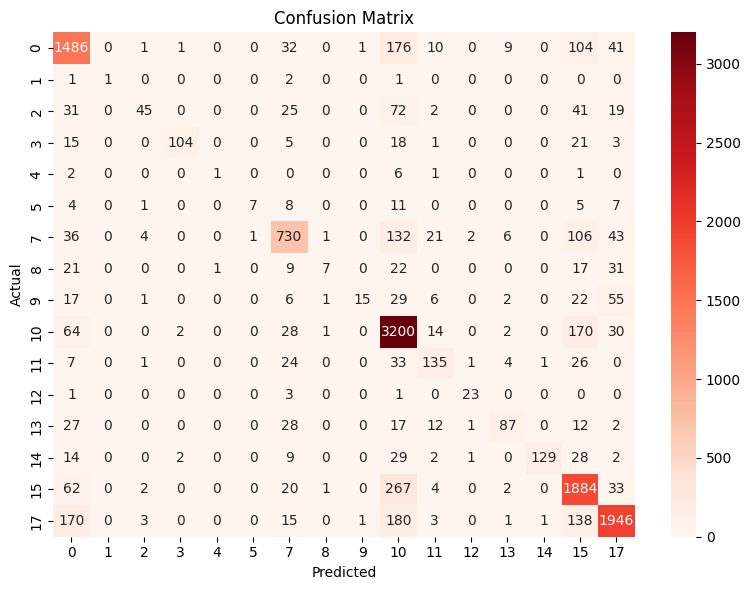

In [18]:
y_true = np.array(y_test).flatten()
y_pred = np.array(y_pred).flatten()
cm = confusion_matrix(y_test, y_pred)
class_labels = [str(lbl) for lbl in np.unique(np.concatenate((y_true, y_pred)))]
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True,fmt='d', cmap='Reds', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78      1861
           1       1.00      0.20      0.33         5
           2       0.78      0.19      0.31       235
           3       0.95      0.62      0.75       167
           4       0.50      0.09      0.15        11
           5       0.88      0.16      0.27        43
           7       0.77      0.67      0.72      1082
           8       0.64      0.06      0.12       108
           9       0.88      0.10      0.18       154
          10       0.76      0.91      0.83      3511
          11       0.64      0.58      0.61       232
          12       0.82      0.82      0.82        28
          13       0.77      0.47      0.58       186
          14       0.98      0.60      0.74       216
          15       0.73      0.83      0.78      2275
          17       0.88      0.79      0.83      2458

    accuracy                           0.78     12572
   macro avg       0.80   

In [20]:
def custom_predict(new_sample):
    new_df = pd.DataFrame([new_sample])
    for col in input_cols:
        new_df[col] = label_encoders[col].transform(new_df[col].astype(str))
    prediction = model.predict(new_df)
    crash_type = label_encoders['FIRST_CRASH_TYPE'].inverse_transform(prediction)[0]
    return crash_type

### Good results

In [38]:
new_sample = {
    'POSTED_SPEED_LIMIT': '40',
    'WEATHER_CONDITION': 'CLEAR',
    'LIGHTING_CONDITION': 'DAYLIGHT',
    'TRAFFICWAY_TYPE': 'FOUR WAY',
    'ALIGNMENT': 'STRAIGHT AND LEVEL',
    'ROADWAY_SURFACE_COND': 'DRY',
    'ROAD_DEFECT': 'UNKNOWN',
    'PRIM_CONTRIBUTORY_CAUSE': 'FAILING TO REDUCE SPEED TO AVOID CRASH',
    'SEC_CONTRIBUTORY_CAUSE': 'DISTRACTION - FROM INSIDE VEHICLE',
    'CRASH_HOUR': '12.0',
    'CRASH_DAY_OF_WEEK':'6.0',
    'CRASH_MONTH':'8.0',
    'MANEUVER':'STRAIGHT AHEAD',
    'SEX':'M',
    'AGE': '35.0'
}

print(f"Predicted Crash Type: {custom_predict(new_sample)}")

Predicted Crash Type: REAR END


In [42]:
new_sample = {
    'POSTED_SPEED_LIMIT': '30',
    'WEATHER_CONDITION': 'CLEAR',
    'LIGHTING_CONDITION': 'DARKNESS',
    'TRAFFICWAY_TYPE': 'ONE-WAY',
    'ALIGNMENT': 'STRAIGHT AND LEVEL',
    'ROADWAY_SURFACE_COND': 'DRY',
    'ROAD_DEFECT': 'NO DEFECTS',
    'PRIM_CONTRIBUTORY_CAUSE': 'IMPROPER LANE USAGE',
    'SEC_CONTRIBUTORY_CAUSE': 'NOT APPLICABLE',
    'CRASH_HOUR': '19.0',
    'CRASH_DAY_OF_WEEK':'3.0',
    'CRASH_MONTH':'12.0',
    'MANEUVER':'STRAIGHT AHEAD',
    'SEX':'F',
    'AGE': '30.0'
}

print(f"Predicted Crash Type: {custom_predict(new_sample)}")

Predicted Crash Type: SIDESWIPE SAME DIRECTION


In [45]:
new_sample = {
    'POSTED_SPEED_LIMIT': '35',
    'WEATHER_CONDITION': 'CLEAR',
    'LIGHTING_CONDITION': 'DARKNESS',
    'TRAFFICWAY_TYPE': 'FOUR WAY',
    'ALIGNMENT': 'STRAIGHT AND LEVEL',
    'ROADWAY_SURFACE_COND': 'DRY',
    'ROAD_DEFECT': 'UNKNOWN',
    'PRIM_CONTRIBUTORY_CAUSE': 'NOT APPLICABLE',
    'SEC_CONTRIBUTORY_CAUSE': 'NOT APPLICABLE',
    'CRASH_HOUR': '17.0',
    'CRASH_DAY_OF_WEEK':'5.0',
    'CRASH_MONTH':'2.0',
    'MANEUVER':'STRAIGHT AHEAD',
    'SEX':'M',
    'AGE': '40.0'
}

print(f"Predicted Crash Type: {custom_predict(new_sample)}")

Predicted Crash Type: ANGLE


In [50]:
new_sample = {
    'POSTED_SPEED_LIMIT': '55',
    'WEATHER_CONDITION': 'RAIN',
    'LIGHTING_CONDITION': 'DAWN',
    'TRAFFICWAY_TYPE': 'DIVIDED - W/MEDIAN BARRIER',
    'ALIGNMENT': 'STRAIGHT AND LEVEL',
    'ROADWAY_SURFACE_COND': 'WET',
    'ROAD_DEFECT': 'NO DEFECTS',
    'PRIM_CONTRIBUTORY_CAUSE': 'UNABLE TO DETERMINE',
    'SEC_CONTRIBUTORY_CAUSE': 'UNABLE TO DETERMINE',
    'CRASH_HOUR': '10.0',
    'CRASH_DAY_OF_WEEK':'7.0',
    'CRASH_MONTH':'9.0',
    'MANEUVER':'STRAIGHT AHEAD',
    'SEX':'F',
    'AGE': '50.0'
}

print(f"Predicted Crash Type: {custom_predict(new_sample)}")

Predicted Crash Type: SIDESWIPE SAME DIRECTION


### No results

In [46]:
new_sample = {
    'POSTED_SPEED_LIMIT': '50',
    'WEATHER_CONDITION': 'CLEAR',
    'LIGHTING_CONDITION': 'DAYLIGHT',
    'TRAFFICWAY_TYPE': 'TWO WAY',
    'ALIGNMENT': 'STRAIGHT AND LEVEL',
    'ROADWAY_SURFACE_COND': 'WET',
    'ROAD_DEFECT': 'NO DEFECTS',
    'PRIM_CONTRIBUTORY_CAUSE': 'FOLLOWING TOO CLOSELY',
    'SEC_CONTRIBUTORY_CAUSE': 'UNABLE TO DETERMINE',
    'CRASH_HOUR': '12.0',
    'CRASH_DAY_OF_WEEK':'6.0',
    'CRASH_MONTH':'8.0',
    'MANEUVER':'STRAIGHT AHEAD',
    'SEX':'M',
    'AGE': '35.0'
}

print(f"Predicted Crash Type: {custom_predict(new_sample)}")

ValueError: y contains previously unseen labels: 'TWO WAY'

### hyperparameters tuning to find the best combination at random

In [ ]:
# Define a rich parameter grid (about 40+ combinations)
param_dist = {
    'n_estimators': [100, 150, 200, 250, 300],          # 5
    'max_depth': [None, 10, 15, 20],                    # 4
    'min_samples_split': [2, 5, 10],                    # 3
    'min_samples_leaf': [1, 2, 4],                      # 3
    'max_features': ['sqrt', 'log2', None],             # 3
    'bootstrap': [True, False]                          # 2
}
# Total combos = 5 × 4 × 3 × 3 × 3 × 2 = **1,080** (big space!)


In [ ]:
# We'll sample only 15 of those randomly
rf = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=15,                  # Try 15 random combinations
    cv=5,                       # 5-fold cross-validation
    scoring='accuracy',        # Can change to f1, roc_auc, etc.
    verbose=2,
    random_state=42,
    n_jobs=-1                   # Use all cores
)

In [ ]:
random_search.fit(X_train, y_train)

# Print the best result
print("Best Parameters Found:")
print(random_search.best_params_)
print(f"Best Cross-Validation Accuracy: {random_search.best_score_:.4f}")


Fitting 5 folds for each of 15 candidates, totalling 75 fits


c:\Users\veliv\anaconda3\envs\ALPR\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
27 fits failed out of a total of 75.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\veliv\anaconda3\envs\ALPR\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\veliv\anaconda3\envs\ALPR\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\veliv\anaconda3\envs\ALPR\Lib\site-packages\sklearn\ensemble\_forest.py",

Best Parameters Found:
{'n_estimators': 150, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}
Best Cross-Validation Accuracy: 0.5000


In [ ]:
best_model = random_search.best_estimator_

In [ ]:
dump(best_model, 'RFclassifier_RSCV.joblib')

In [ ]:
best_model = load('RFclassifier_RSCV.joblib')

In [ ]:
y_pred = best_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.499584994857545


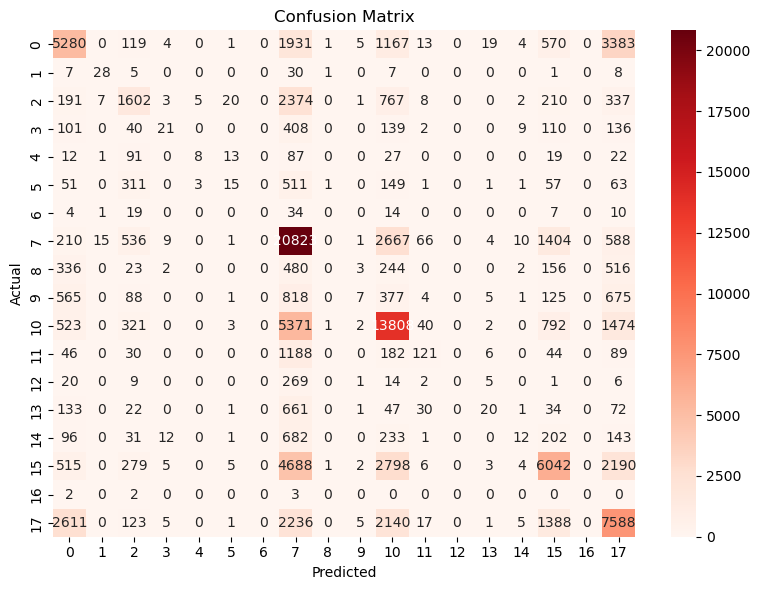

In [ ]:
y_true = np.array(y_test).flatten()
y_pred = np.array(y_pred).flatten()
cm = confusion_matrix(y_test, y_pred)
class_labels = [str(lbl) for lbl in np.unique(np.concatenate((y_true, y_pred)))]
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True,fmt='d', cmap='Reds', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.49      0.42      0.46     12497
           1       0.54      0.32      0.40        87
           2       0.44      0.29      0.35      5527
           3       0.34      0.02      0.04       966
           4       0.50      0.03      0.05       280
           5       0.24      0.01      0.02      1164
           6       0.00      0.00      0.00        89
           7       0.49      0.79      0.60     26334
           8       0.00      0.00      0.00      1762
           9       0.25      0.00      0.01      2666
          10       0.56      0.62      0.59     22337
          11       0.39      0.07      0.12      1706
          12       0.00      0.00      0.00       327
          13       0.30      0.02      0.04      1022
          14       0.24      0.01      0.02      1413
          15       0.54      0.37      0.44     16538
          16       0.00      0.00      0.00         7
          17       0.44    

c:\Users\veliv\anaconda3\envs\ALPR\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\veliv\anaconda3\envs\ALPR\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\veliv\anaconda3\envs\ALPR\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
def RSCV_custom_predict(new_sample):
    new_df = pd.DataFrame([new_sample])
    for col in input_cols:
        new_df[col] = label_encoders[col].transform(new_df[col].astype(str))
    prediction = best_model.predict(new_df)
    crash_type = label_encoders['FIRST_CRASH_TYPE'].inverse_transform(prediction)[0]
    return crash_type

In [ ]:
new_sample = {
    'POSTED_SPEED_LIMIT': '40',
    'WEATHER_CONDITION': 'CLEAR',
    'LIGHTING_CONDITION': 'DAYLIGHT',
    'TRAFFICWAY_TYPE': 'FOUR WAY',
    'ALIGNMENT': 'STRAIGHT AND LEVEL',
    'ROADWAY_SURFACE_COND': 'DRY',
    'ROAD_DEFECT': 'UNKNOWN',
    'INTERSECTION_RELATED_I': 'Y',
    'NOT_RIGHT_OF_WAY_I': 'UNKNOWN',
    'PRIM_CONTRIBUTORY_CAUSE': 'FAILING TO REDUCE SPEED TO AVOID CRASH',
    'SEC_CONTRIBUTORY_CAUSE': 'DISTRACTION - FROM INSIDE VEHICLE'
}

print(f"Predicted Crash Type: {RSCV_custom_predict(new_sample)}")

Predicted Crash Type: REAR END


In [ ]:
new_sample = {
    'POSTED_SPEED_LIMIT': '30',
    'WEATHER_CONDITION': 'CLEAR',
    'LIGHTING_CONDITION': 'DARKNESS',
    'TRAFFICWAY_TYPE': 'ONE-WAY',
    'ALIGNMENT': 'STRAIGHT AND LEVEL',
    'ROADWAY_SURFACE_COND': 'DRY',
    'ROAD_DEFECT': 'NO DEFECTS',
    'INTERSECTION_RELATED_I': 'UNKNOWN',
    'NOT_RIGHT_OF_WAY_I': 'UNKNOWN',
    'PRIM_CONTRIBUTORY_CAUSE': 'IMPROPER LANE USAGE',
    'SEC_CONTRIBUTORY_CAUSE': 'NOT APPLICABLE'
}

print(f"Predicted Crash Type: {RSCV_custom_predict(new_sample)}")

Predicted Crash Type: PARKED MOTOR VEHICLE


In [ ]:
new_sample = {
    'POSTED_SPEED_LIMIT': '35',
    'WEATHER_CONDITION': 'CLEAR',
    'LIGHTING_CONDITION': 'DAYLIGHT',
    'TRAFFICWAY_TYPE': 'FOUR WAY',
    'ALIGNMENT': 'STRAIGHT AND LEVEL',
    'ROADWAY_SURFACE_COND': 'DRY',
    'ROAD_DEFECT': 'UNKNOWN',
    'INTERSECTION_RELATED_I': 'Y',
    'NOT_RIGHT_OF_WAY_I': 'UNKNOWN',
    'PRIM_CONTRIBUTORY_CAUSE': 'FAILING TO REDUCE SPEED TO AVOID CRASH',
    'SEC_CONTRIBUTORY_CAUSE': 'DISTRACTION - FROM INSIDE VEHICLE'
}

print(f"Predicted Crash Type: {RSCV_custom_predict(new_sample)}")

Predicted Crash Type: REAR END


In [ ]:
new_sample = {
    'POSTED_SPEED_LIMIT': '55',
    'WEATHER_CONDITION': 'RAIN',
    'LIGHTING_CONDITION': 'DAWN',
    'TRAFFICWAY_TYPE': 'DIVIDED - W/MEDIAN BARRIER',
    'ALIGNMENT': 'STRAIGHT AND LEVEL',
    'ROADWAY_SURFACE_COND': 'WET',
    'ROAD_DEFECT': 'NO DEFECTS',
    'INTERSECTION_RELATED_I': 'UNKNOWN',
    'NOT_RIGHT_OF_WAY_I': 'UNKNOWN',
    'PRIM_CONTRIBUTORY_CAUSE': 'UNABLE TO DETERMINE',
    'SEC_CONTRIBUTORY_CAUSE': 'UNABLE TO DETERMINE'
}

print(f"Predicted Crash Type: {RSCV_custom_predict(new_sample)}")

Predicted Crash Type: FIXED OBJECT


In [ ]:
new_sample = {
    'POSTED_SPEED_LIMIT': '50',
    'WEATHER_CONDITION': 'CLEAR',
    'LIGHTING_CONDITION': 'DAYLIGHT',
    'TRAFFICWAY_TYPE': 'TWO WAY',
    'ALIGNMENT': 'STRAIGHT AND LEVEL',
    'ROADWAY_SURFACE_COND': 'WET',
    'ROAD_DEFECT': 'NO DEFECTS',
    'INTERSECTION_RELATED_I': 'UNKNOWN',
    'NOT_RIGHT_OF_WAY_I': 'UNKNOWN',
    'PRIM_CONTRIBUTORY_CAUSE': 'FOLLOWING TOO CLOSELY',
    'SEC_CONTRIBUTORY_CAUSE': 'UNABLE TO DETERMINE'
}

print(f"Predicted Crash Type: {RSCV_custom_predict(new_sample)}")

ValueError: y contains previously unseen labels: 'TWO WAY'